<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/Avaliacao_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Solicitar o upload do arquivo CSV
uploaded = files.upload()

# Obter o nome do arquivo carregado
filename = next(iter(uploaded))

# Ler o CSV usando pandas
df = pd.read_csv(filename)

# Exibir as primeiras linhas do DataFrame
print(df.head())


Saving MonitoringDrifts.csv to MonitoringDrifts.csv
   month class_choosen class_predicted     spent  expected
0      3             A               A  12706.24  12347.57
1      3             A               B  12710.18  12353.56
2      3             A               A   6760.35   7422.19
3      3             A               A  11799.65  13686.61
4      3             C               A  11923.21  12273.42


In [ ]:
from sklearn.metrics import accuracy_score

In [5]:
m1 = df[df['month'] == 1]
m2 = df[df['month'] == 2]
m3 = df[df['month'] == 3]


In [7]:
print(m1)
print(m2)
print(m3)

        month class_choosen class_predicted     spent  expected
173736      1             A               A  12186.10  13590.56
173737      1             C               C  10504.50  11428.10
173738      1             A               A   9142.69  10053.61
173739      1             B               B  11918.28  10759.63
173740      1             C               C  12804.08  10605.99
...       ...           ...             ...       ...       ...
266603      1             A               B   9607.65   9324.31
266604      1             A               A  11811.97  11811.46
266605      1             A               A  12778.60  12479.19
266606      1             B               B  12371.84  11541.14
266607      1             A               A   7977.79   9542.64

[92872 rows x 5 columns]
        month class_choosen class_predicted     spent  expected
87730       2             A               A  14546.99  15239.27
87731       2             A               A   9130.49   9806.39
87732       2 

In [19]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

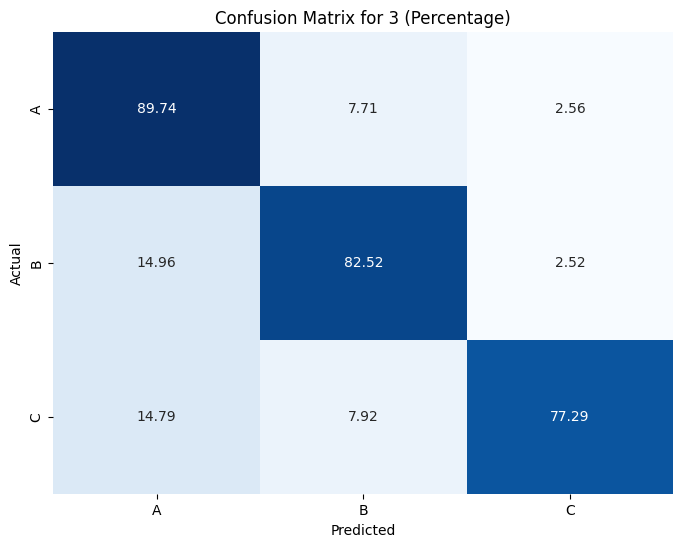

Accuracy for 3: 0.8635
F1 Score for class A in 3: 0.8991
F1 Score for class B in 3: 0.8228
F1 Score for class C in 3: 0.7707
RMSE for 3: 15.60%
--------------------------------------------------


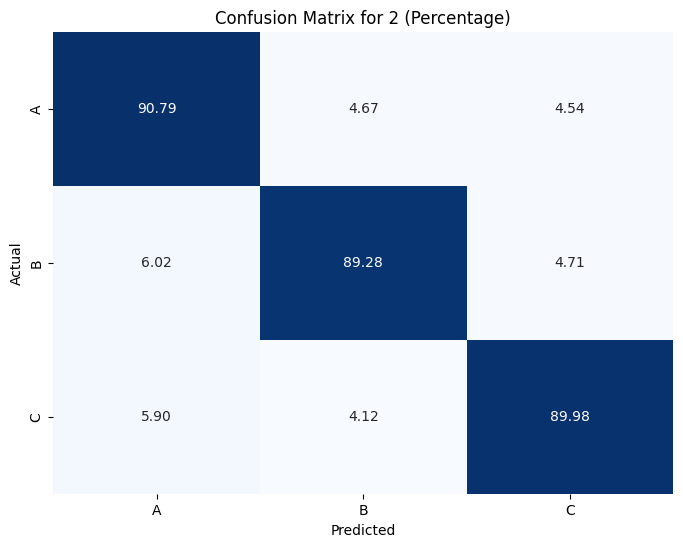

Accuracy for 2: 0.9009
F1 Score for class A in 2: 0.9095
F1 Score for class B in 2: 0.8942
F1 Score for class C in 2: 0.8961
RMSE for 2: 38.59%
--------------------------------------------------


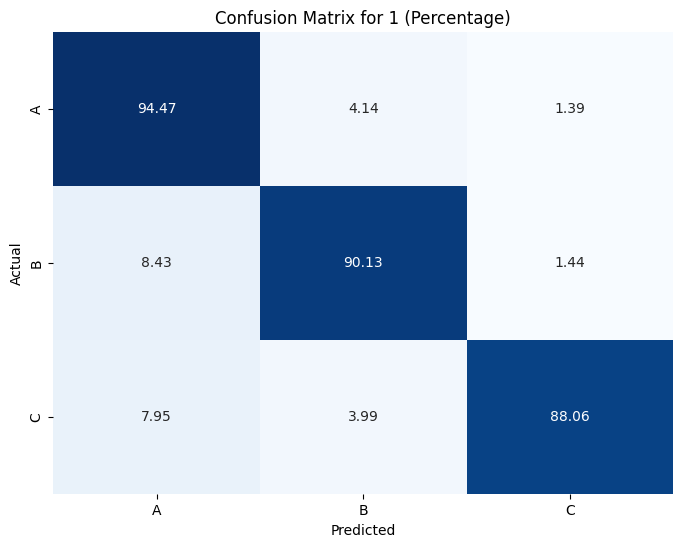

Accuracy for 1: 0.9253
F1 Score for class A in 1: 0.9446
F1 Score for class B in 1: 0.9025
F1 Score for class C in 1: 0.8778
RMSE for 1: 12.20%
--------------------------------------------------


In [20]:
# Step 2: Separate the data by month
months = df['month'].unique()

# Step 3: For each month, compare class_choosen and class_predicted and create a confusion matrix
for month in months:
    monthly_data = df[df['month'] == month]

    # Confusion Matrix
    cm = confusion_matrix(monthly_data['class_choosen'], monthly_data['class_predicted'])

    # Convert to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plotting the Confusion Matrix with percentages
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False,
                xticklabels=np.unique(monthly_data['class_predicted']),
                yticklabels=np.unique(monthly_data['class_choosen']))
    plt.title(f'Confusion Matrix for {month} (Percentage)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Accuracy
    accuracy = accuracy_score(monthly_data['class_choosen'], monthly_data['class_predicted'])
    print(f'Accuracy for {month}: {accuracy:.4f}')

    # F1 Score per class
    f1_per_class = f1_score(monthly_data['class_choosen'], monthly_data['class_predicted'], average=None)
    for i, class_label in enumerate(np.unique(monthly_data['class_choosen'])):
        print(f'F1 Score for class {class_label} in {month}: {f1_per_class[i]:.4f}')

    # Step 4: Compare spent and expected, calculate RMSE as percentage
    rmse = np.sqrt(mean_squared_error(monthly_data['expected'], monthly_data['spent']))
    mean_expected = np.mean(monthly_data['expected'])
    rmse_percentage = (rmse / mean_expected) * 100
    print(f'RMSE for {month}: {rmse_percentage:.2f}%')

    print('-' * 50)


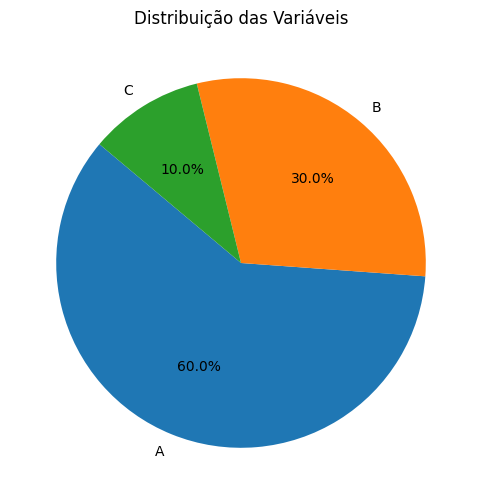

In [21]:
# target

frequency = m1['class_choosen'].value_counts()


import matplotlib.pyplot as plt

# Dados para o gráfico de pizza
labels = frequency.index
sizes = frequency.values

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Variáveis')
plt.show()

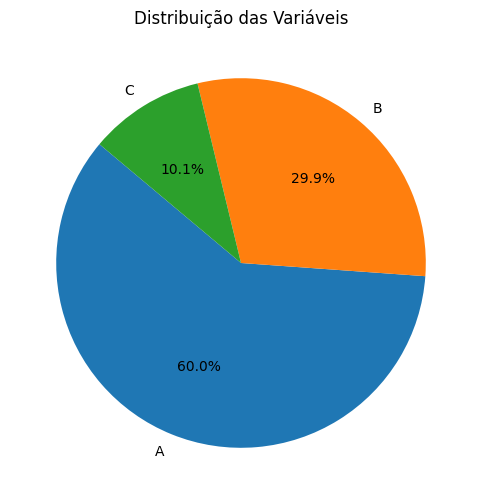

In [22]:
#m1
frequency = m1['class_predicted'].value_counts()


import matplotlib.pyplot as plt

# Dados para o gráfico de pizza
labels = frequency.index
sizes = frequency.values

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Variáveis')
plt.show()

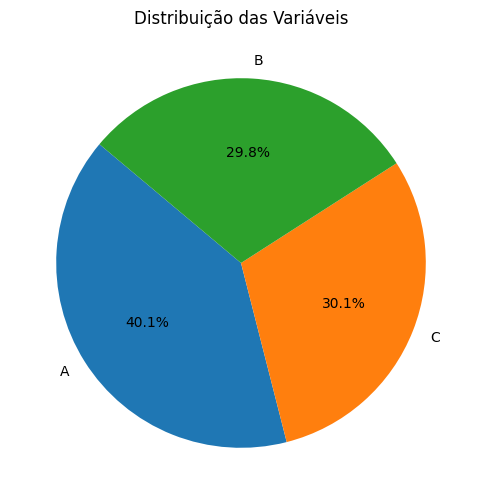

In [23]:
#m2
frequency = m2['class_predicted'].value_counts()


import matplotlib.pyplot as plt

# Dados para o gráfico de pizza
labels = frequency.index
sizes = frequency.values

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Variáveis')
plt.show()

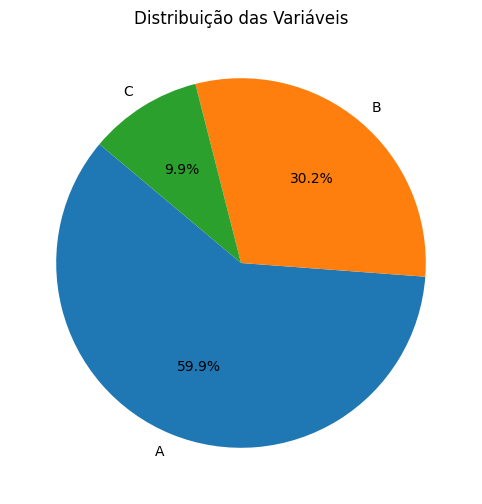

In [24]:
#m3
frequency = m3['class_predicted'].value_counts()


import matplotlib.pyplot as plt

# Dados para o gráfico de pizza
labels = frequency.index
sizes = frequency.values

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Variáveis')
plt.show()

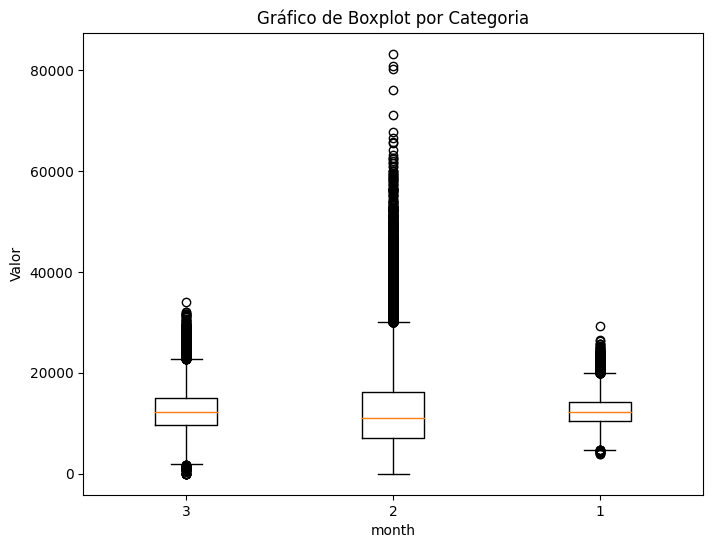

In [25]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['month'] == cat]['expected'] for cat in df['month'].unique()],
            labels=df['month'].unique())
plt.title('Gráfico de Boxplot por Categoria')
plt.xlabel('month')
plt.ylabel('Valor')
plt.show()